In [1]:
import matplotlib.pyplot as plt

from ngram import NGram

%matplotlib inline

[nltk_data] Downloading package punkt to /home/don/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Для большего удобства был создан класс "NGram" в котором реализованы:
* загрузка коллекции текста и токенизация
* обучение модели биграмм и триграмм
* обучение модели без сглаживания или со одним из видов сглаживания ("add-one", "add-k",)
* подсчет вероятности фразы
* подсчет перплексии фразы

Для разрешения проблемы с неизвестными словами, все низкочастотные слова (в данном классе слова, абсолютная частота которых не превышает 2) были помечены специальным токеном "<UNK\>". Неизвестные слова из подаваемых фраз так же помечаются как "<UNK\>".

In [2]:
model = NGram()

initializing model
reading "anna-karenina.txt"
reading "alisa.txt"
reading "prestuplenie_i_nakazanie.txt"
reading "mertvye-dushi.txt"
reading "idiot.txt"
read 1029965 tokens
marking <UNK> with threshold: 3
found 58510 <UNK> tokens
marked 100% tokens


In [4]:
test_sents = [
    'Она сняла шляпку',
    'она ничего не',
    'под функцией Дирихле',
    'сказал он',
    'не понимаю',
    'правила робототехники',
    'быть или не быть',
    'пусть треугольник',
]

Эксперимент с моделью без сглаживания.

In [5]:
model.train(smoothing=None)

In [6]:
model.print_prob_and_perp(test_sents)

avg prob: 0.044799948017704
max prob: 0.237344398340249
min prob: 0.000000000000000
avg perp: inf
max perp: inf
min perp: 0.017763139773676


Эксперимент с моделью со сглаживанием Лапласа.

In [7]:
model.train(smoothing='add-one')

In [8]:
model.print_prob_and_perp(test_sents)

avg prob: 0.000020609249293
max prob: 0.000041845398417
min prob: 0.000000000000069
avg perp: 0.003724076525835
max perp: 0.006468801930545
min perp: 0.000512598524141


Эксперимент с моделью с аддитивным сглаживанием с параметром k=0.1

In [9]:
model.train(smoothing='add-k', k=0.1)

In [10]:
model.print_prob_and_perp(test_sents)

avg prob: 0.000026831678310
max prob: 0.000089271941406
min prob: 0.000000000000085
avg perp: 0.004224583118116
max perp: 0.009448383004828
min perp: 0.000540002643831


Эксперимент с моделью с аддитивным сглаживанием с параметром k=0.05

In [11]:
model.train(smoothing='add-k', k=0.05)

In [12]:
model.print_prob_and_perp(test_sents)

avg prob: 0.000037308437821
max prob: 0.000169992886069
min prob: 0.000000000000117
avg perp: 0.004837142225781
max perp: 0.013038132000767
min perp: 0.000585086304888


Эксперимент с моделью с аддитивным сглаживанием с параметром k=0.000016

In [13]:
model.train(smoothing='add-k', k=0.000016)

In [14]:
model.print_prob_and_perp(test_sents)

avg prob: 0.031755161897140
max prob: 0.170690273507538
min prob: 0.000000037996858
avg perp: 0.137741467663833
max perp: 0.413146794139248
min perp: 0.003396042172314


Эксперименты с моделью с аддитивным сглаживанием с различными параметрами показали, что значения вероятностей заметно изменяются в зависимости от значения параметра. Проверим какое именно себя ведут вероятности на графике.

In [50]:
def add_k_graph(show_max=True, show_min=True, show_avg=True):
    xs = []
    avg_probs = []
    max_probs = []
    min_probs = []
    avg_perps = []
    max_perps = []
    min_perps = []
    n = 100

    for i in range(n):
        cur_k = 0.00001 * (i + 1)
        print(f'\rcounting prob and perp for k={cur_k}', end='')
        model.train(smoothing='add-k', k=cur_k)
        xs.append(cur_k)
        avg_prob, max_prob, min_prob, avg_perp, max_perp, min_perp = \
            model.count_prob_and_perp(test_sents)
        avg_probs.append(avg_prob)
        max_probs.append(max_prob)
        min_probs.append(min_prob)
        avg_perps.append(avg_perp)
        max_perps.append(max_perp)
        min_perps.append(min_perp)
    print('\rplotting')
    
    plt.figure(figsize=(25, 5))

    plt.subplot(131)
    if show_avg:
        _ = plt.plot(xs, avg_probs, label='avg probs')
    if show_max:
        _ = plt.plot(xs, max_probs, label='max probs')
    if show_min:
        _ = plt.plot(xs, min_probs, label='min probs')
    plt.legend()

    plt.subplot(132)
    if show_avg:
        _ = plt.plot(xs, avg_perps, label='avg perps')
    if show_max:
        _ = plt.plot(xs, max_perps, label='max perps')
    if show_min:
        _ = plt.plot(xs, min_perps, label='min perps')
    plt.legend()
    plt.show()
    

plotting


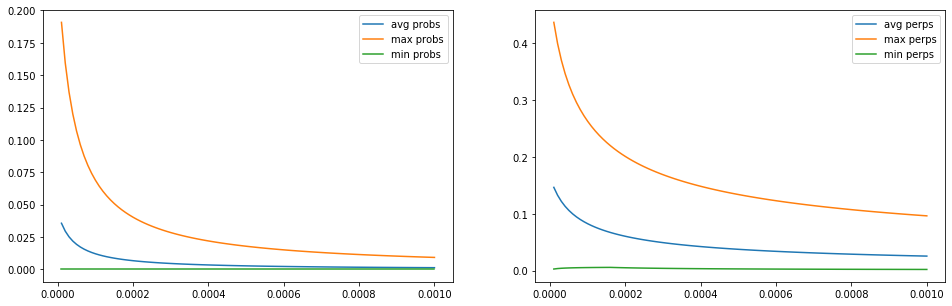

In [51]:
add_k_graph()

На графиках выше видно, что чем меньше параметр сглаживания k, тем выше максимальная и средняя вероятность. Но также можно заметить то, что минимальная вероятность остается примерно на одном уровне, а максимальная вероятность растет гораздо быстрее, чем средняя.

plotting


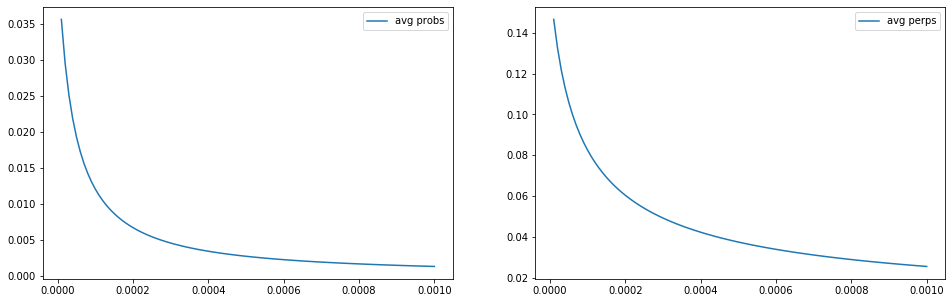

In [52]:
add_k_graph(show_max=False, show_min=False)

plotting


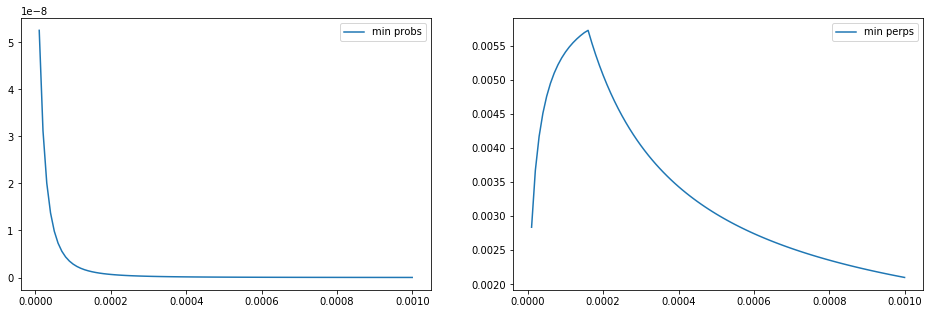

In [53]:
add_k_graph(show_avg=False, show_max=False)